Data Set Information:

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date.

* Age (age in years)
* Sex (1 = male; 0 = female)
* CP (chest pain type, Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic )
* TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
* CHOL (serum cholestoral in mg/dl)
* FBS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* RESTECG (resting electrocardiographic results)
* THALACH (maximum heart rate achieved)
* EXANG (exercise induced angina (1 = yes; 0 = no))
* OLDPEAK (ST depression induced by exercise relative to rest)
* SLOPE (the slope of the peak exercise ST segment, -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping)
* CA (number of major vessels (0-3) colored by flourosopy)
* THAL (1 = normal; 2 = fixed defect; 3 = reversable defect)
* TARGET (1 or 0, diagnosis of heart disease (angiographic disease status) -- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing)

Among the 14 data columns, target is the prediction as the outcome of model.  The 6 numerical variables include age, trestbps, chol, thalach, oldpeak, and ca, whereas the 7 categorical variables are sex, cp, fbs, restecg, exang, slope, and thal.  

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import seaborn as sns
%matplotlib inline

# url= 'https://github.com/cwhung/Heart_Disease/blob/master/heart.csv'

df = pd.read_csv('heart.csv')

# print first 8 rows
print ("\n\nFirst 8 rows\n")
print (df.head(8))




First 8 rows

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  
7   0     3       1  


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


## Descriptive Statistics

In [111]:
# print descriptive stats
print (df[['age','trestbps', 'chol', 'thalach','oldpeak', 'ca']].describe())


df.sex.value_counts()

              age    trestbps        chol     thalach     oldpeak          ca
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604    0.729373
std      9.082101   17.538143   51.830751   22.905161    1.161075    1.022606
min     29.000000   94.000000  126.000000   71.000000    0.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000    0.000000
75%     61.000000  140.000000  274.500000  166.000000    1.600000    1.000000
max     77.000000  200.000000  564.000000  202.000000    6.200000    4.000000


1    207
0     96
Name: sex, dtype: int64

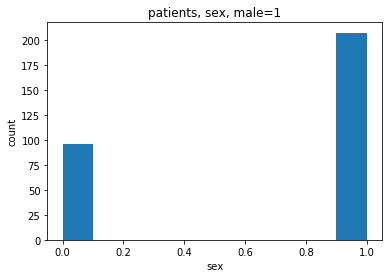

In [114]:
plt.hist(df['sex'])
plt.xlabel('sex')
plt.ylabel('count')
plt.title('patients, sex, male=1')
plt.show()

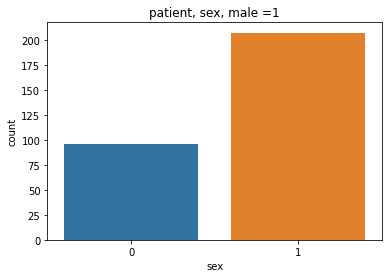

In [115]:
sns.countplot(x='sex', data=df)
plt.title('patient, sex, male =1')
plt.show()

In [120]:
# Table of age statistics grouped by sex
df.groupby('sex').age.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0,96.0,55.677083,9.409396,34.0,49.75,57.0,63.0,76.0
1,207.0,53.758454,8.883803,29.0,47.00,54.0,59.5,77.0


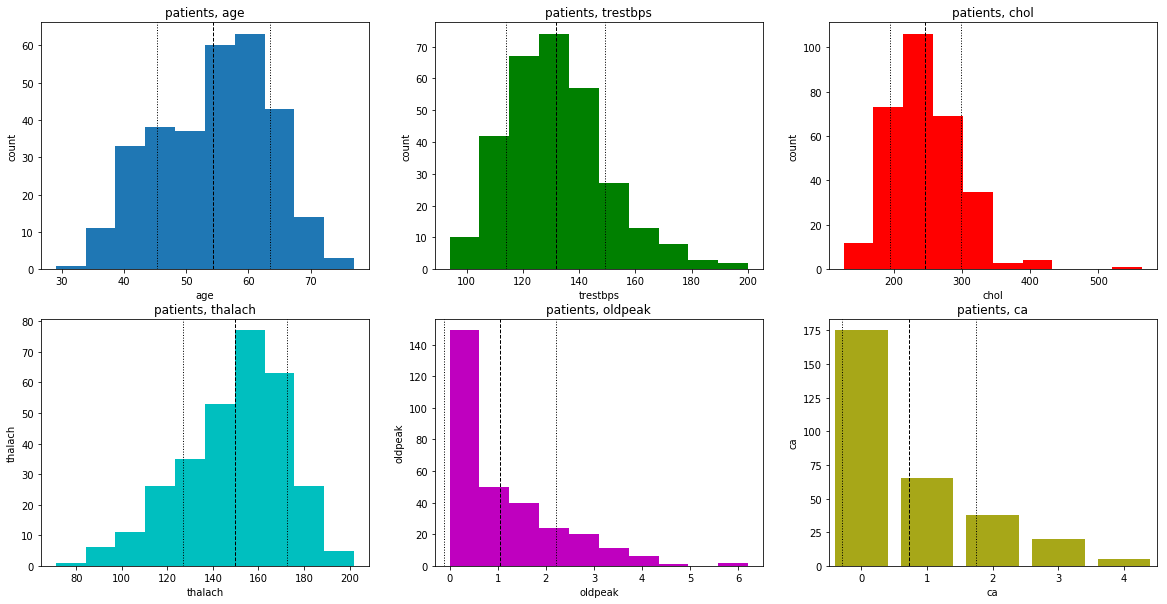

In [84]:
fig=plt.figure(figsize = (20, 10))

plt.subplot(2, 3, 1)
plt.hist(df['age'])
plt.xlabel('age')
plt.ylabel('count')
plt.title('patients, age')
plt.axvline(df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['age'].mean()+df['age'].std(), color='k', linestyle='dotted', linewidth=1)
plt.axvline(df['age'].mean()-df['age'].std(), color='k', linestyle='dotted', linewidth=1)


plt.subplot(2, 3, 2)
plt.hist(df['trestbps'], color ='g')
plt.xlabel('trestbps')
plt.ylabel('count')
plt.title('patients, trestbps')
plt.axvline(df['trestbps'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['trestbps'].mean()+df['trestbps'].std(), color='k', linestyle='dotted', linewidth=1)
plt.axvline(df['trestbps'].mean()-df['trestbps'].std(), color='k', linestyle='dotted', linewidth=1)

plt.subplot(2, 3, 3)
plt.hist(df['chol'], color ='r')
plt.xlabel('chol')
plt.ylabel('count')
plt.title('patients, chol')
plt.axvline(df['chol'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['chol'].mean()+df['chol'].std(), color='k', linestyle='dotted', linewidth=1)
plt.axvline(df['chol'].mean()-df['chol'].std(), color='k', linestyle='dotted', linewidth=1)

plt.subplot(2, 3, 4)
plt.hist(df['thalach'], color ='c')
plt.xlabel('thalach')
plt.ylabel('thalach')
plt.title('patients, thalach')
plt.axvline(df['thalach'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['thalach'].mean()+df['thalach'].std(), color='k', linestyle='dotted', linewidth=1)
plt.axvline(df['thalach'].mean()-df['thalach'].std(), color='k', linestyle='dotted', linewidth=1)

plt.subplot(2, 3, 5)
plt.hist(df['oldpeak'], color ='m')
plt.xlabel('oldpeak')
plt.ylabel('oldpeak')
plt.title('patients, oldpeak')
plt.axvline(df['oldpeak'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['oldpeak'].mean()+df['oldpeak'].std(), color='k', linestyle='dotted', linewidth=1)
plt.axvline(df['oldpeak'].mean()-df['oldpeak'].std(), color='k', linestyle='dotted', linewidth=1)

plt.subplot(2, 3, 6)
#plt.hist(df['ca'])
sns.countplot(x='ca', data=df, color ='y')
plt.xlabel('ca')
plt.ylabel('ca')
plt.title('patients, ca')
plt.axvline(df['ca'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['ca'].mean()+df['ca'].std(), color='k', linestyle='dotted', linewidth=1)
plt.axvline(df['ca'].mean()-df['ca'].std(), color='k', linestyle='dotted', linewidth=1)
plt.show()

The study includes 303 patients (207 male and 96 female).  The average age is 54.37 with standard deviation 9.08.  

In [48]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

165 out of 303 patients are diagnosed with heart disease.  

In [60]:
data_linear= df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target']]
data_linear.corr()

,age,trestbps,chol,thalach,oldpeak,ca,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,0.276326,-0.225439
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216,0.101389,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,0.070511,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.213177,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.222682,-0.430696
ca,0.276326,0.101389,0.070511,-0.213177,0.222682,1.000000,-0.391724
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,-0.391724,1.000000


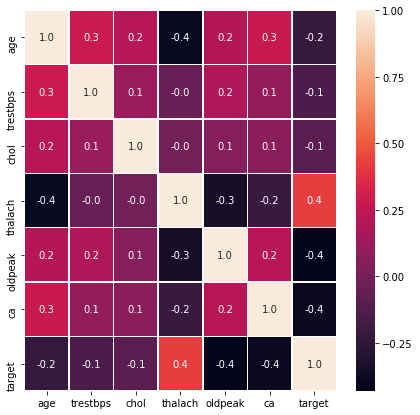

In [90]:
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(data_linear.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

This heat map showed the correlation between each numerical inputs and the predition (target).  The bottom line information is that the correlation coefficients are 0.4, -0.4 and -0.4 between target and (thalach, oldpeak and ca) respsctively. I will discuss this in the following.  

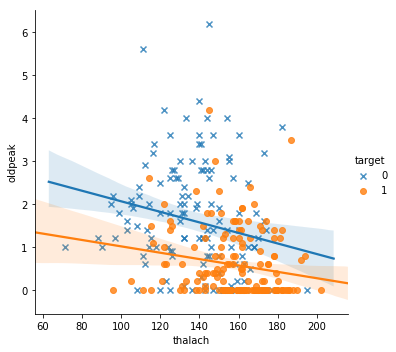

In [100]:
sns.lmplot(x="thalach", y="oldpeak", hue="target",markers=["x", "o"], data=df)
plt.show()

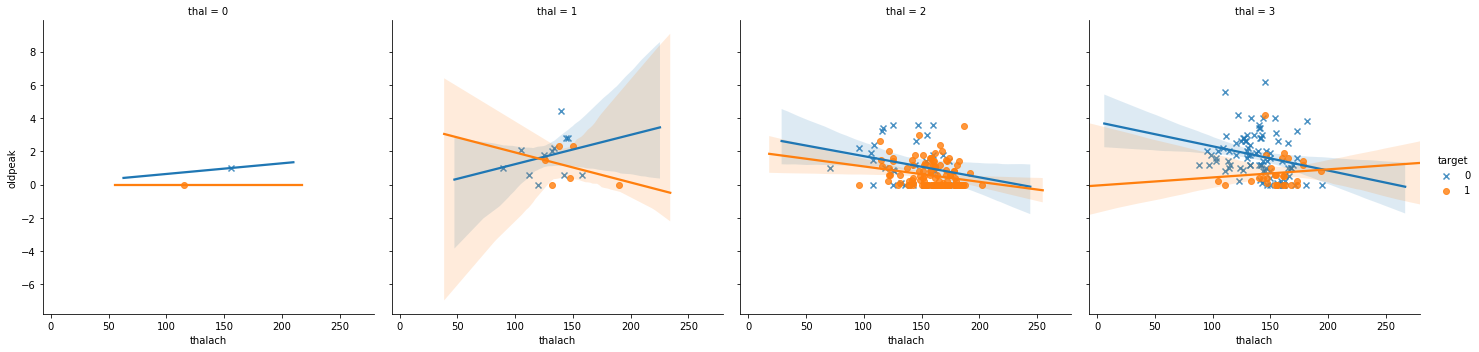

In [101]:
sns.lmplot(x="thalach", y="oldpeak", hue="target", col='thal', markers=["x", "o"], data=df)
plt.show()

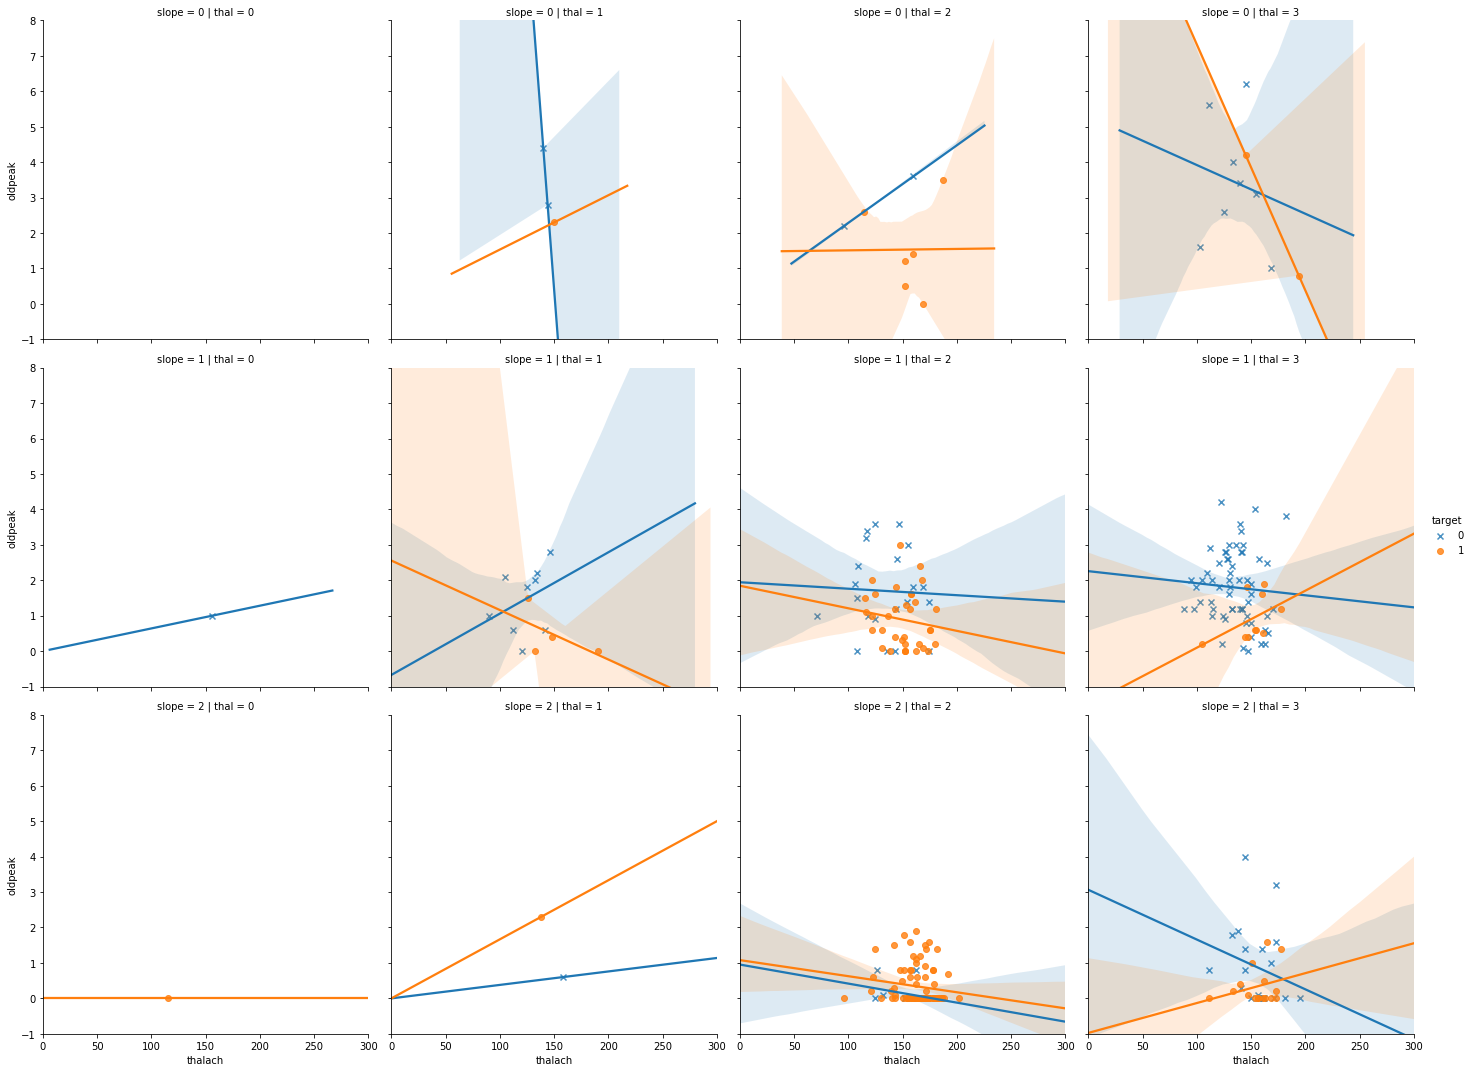

In [110]:
sns.lmplot(x="thalach", y="oldpeak", hue="target", col='thal', row='slope', markers=["x", "o"], data=df)
plt.xlim(0, 300)
plt.ylim(-1, 8)

plt.show()

# Logistic Regression